# Complex Sentiment Analysis
### Frequency of positive and negaitive words from a Sentiment Lexicon appearing in a dataset

#### Opening data files

The needed positive and negative word lists are .csv files found in the [Sentiment_Analysis/data](https://github.com/cyberdh/Text-Analysis/tree/master/Sentiment_Analysis/data) folder.



### Include necessary packages for notebook 

Python's extensibility comes in large part from packages. Packages are groups of functions, data, and algorithms that allow users to easily carry out processes without recreating the wheel. Some packages are included in the basic installation of Python, others created by Python users are available for download. Make sure to have the following packages installed before beginning so that they can be accessed while running the scripts.

In your terminal, packages can be installed by simply typing "pip install nameofpackage --user" (minus the quotes).

- **pandas:** An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **re:** Provides regular expression matching operations similar to those found in Perl.
- **os:** This module provides a portable way of using operating system dependent functionality.
- **json:** Used to parse and manipulate data in JSON format.
- **glob:** Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell, although results are returned in arbitrary order.

In [1]:
import pandas as pd
import re
import os
import json
import glob

Here we save the two file paths we will need throughout this notebook. This way we only need to make changes here and they will be implemeneted throughout the code. Change these to match where your data can be found (dataHome) and where you want any output such as .csv files or images to be saved (dataResults).

In [2]:
dataHome = '/N/u/klosteda/Carbonate/Text-Analysis-master/data/twitter'
dataResults = '/N/u/klosteda/Carbonate/Text-Analysis-master/Output'

##### Now we load the negative words

Notice that we have added words to the negative list. Feel free to change the words you want to add based on the text you are doing sentiment analysis on. If you want to remove a word from the list simply add to the script the following line: If 'yourWord' in negTokens: negTokens.remove('yourWord'). If you do not wish to add words simply put a '#' (minus the quotes) in front of the lines that add words. These would be 'negAdds =' and 'negTokens.extend(negAdds)'.

In [3]:
neg_file = glob.glob(os.path.join(dataHome, "dict/negativeVADER.csv"))     

for f in neg_file:
    negText = pd.read_csv(f, index_col = False)

neg_df = pd.DataFrame(negText)
negTokens = neg_df['Neg'].tolist()
negAdds = [] 
negTokens.extend(negAdds)
print(negTokens[-10:])

# list to set for efficient lookup
negTokens = set(negTokens)

['trembles', 'trivial', 'unbiased', 'warsaw', 'wellhole', 'winnower', 'winnowing', 'wiseacres', 'wisecrack', 'wisecracker']


###### Now we load the positive words

Notice that we have added words to the positive word list and removed other words from the positive word list. Simply change the words if you wish to add different words and the same with the words being removed. If you do not wish to add or remove simply put a '#' (minus the quotes) in front of the lines that add words and/or the lines that remove words.

In [4]:
pos_file = glob.glob(os.path.join(dataHome, "dict/positiveVADER.csv"))     

for f in pos_file:
    posText = pd.read_csv(f, index_col = False)

pos_df = pd.DataFrame(posText)
posTokens = pos_df['Pos'].tolist()
posAdds = []
posTokens.extend(posAdds)
if 'trump' in posTokens: posTokens.remove('trump')
if 'right' in posTokens: posTokens.remove('right')
print(posTokens[-10:])

# list to set for efficient lookup
posTokens = set(posTokens)

['paradise', 'perfectly', 'lya', 'ecstacy', 'euphoria', 'sweetheart', 'aml', 'ilu', 'ily', 'magnificently']


#### Here we get tweets if in JSON format

This will read tweets if in JSON format. The only part you will need to change is where it says "JSON/\*". This is where we name the folder and we are telling it to read in all the files in the folder. If you have them in a folder with a different name, then change JSON to the name of your folder. If you want to read in only one JSON file, then replace the '\*' with the name of the file. The 'text' is the standard key for the tweet content that comes with the data twitter gives you, so that shouldn't need to be changed.

In [5]:
tweets = []

for filename in glob.glob(os.path.join(dataHome, "JSON/*")):
    with open(filename, encoding = 'utf-8') as json_data:
        for line in json_data:
            tweets.append(json.loads(line))
df = pd.DataFrame(tweets)
df['text'] = df['text'].str.replace('[^\x00-\x7F]','')
df['text'] = df['text'].str.replace('[^\w\s]','')
tweetsTokens = df['text'].tolist()            
print(len(df)) 

27057


###### Here we get the tweets if in .csv file

The only parts in this section you will need to change are the filepath and where it says 'text' (with the quotes). You will definitely need to change the filepath to match where you have your dataset stored. You might need to change 'text' if your column containing your tweet content has a different header name. If yours is labeled 'text' already than you do not need to change it.

In [6]:
#all_files = glob.glob(os.path.join(dataHome, "CSV/*.csv"))     

#df_all = (pd.read_csv(f) for f in all_files)
#cc_df   = pd.concat(df_all, ignore_index=True)
#tweetsText = pd.DataFrame(cc_df)
#tweetsText['text'] = tweetsText['text'].str.replace('[^\x00-\x7F]','')
#tweetsText['text'] = tweetsText['text'].str.replace('[^\w\s]','')
#tweetsTokens = tweetsText['text'].tolist()
#print(tweetsTokens[:6])

## Tokenizing the tweets

Now we will create two functions. The first for tokenizing a tweet, the second for calculating positive/negative words. Note that the calulator function uses the tokenizer function.

In [7]:
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet, posTokenList, negTokenList):
    
    posWordsList = []
    negWordsList = []

    numPosWords = 0 
    numNegWords = 0
    
    theTweetTokens = tokenizer(theTweet)
    
    # Count positive and negative words
    for word in theTweetTokens:
        if word in posTokenList:
            numPosWords += 1
            posWordsList.append(word)
        
        if word in negTokenList:
            numNegWords += 1
            negWordsList.append(word)
        
        
    score = (numPosWords - numNegWords)
    return {'score': score, 'posWordsList' : posWordsList, 'negWordsList' : negWordsList}

# Here is a line for testing this
# print(calculator('"RT @jmichaelkell: To sum it up:', '', '1. Trump - sexual predator', '2. Epstein - convicted pedophile', '3. Milo - pedophilia supporter', '4. Huckabee - pƒ"'))

## Analyzing tweets

Now we will use the calculator to calculate the scores of all the tweets.

In [8]:
# do all calculation once

results = []

for tweet in tweetsTokens:
    results.append(calculator(tweet, posTokens, negTokens))
    
scores = [x['score'] for x in results]

posWordsList = [x['posWordsList'] for x in results]
posWordsList = [item for sublist in posWordsList for item in sublist]

negWordsList = [x['negWordsList'] for x in results]
negWordsList = [item for sublist in negWordsList for item in sublist]

Here we look at the scores and sort them as either positive, negative, or neutral.

In [9]:
# Here we set up the thresholds
posi = 0 # This means there have to be at least 1 positive word
nega = 0 # This means there has to be at least 1 negative words

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.


for score in scores:
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
        
    else:
        numNeutTweets += 1
        

# This prints out the results 
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))


Total: 27057
Positive: 5620
Neutral: 12377
Negative: 9060


#### Gathering positive tweets

This will gather all examples of positive tweets.

In [10]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.



for idx, score in enumerate(scores):
    if score > posi:
        posiTweetList.append(tweetsTokens[idx])
        numPosTweets += 1
        
        if numPosTweets >= numberWanted:
            break

print(posiTweetList)

['RT SenatorMenendez Trump shouldnt treat the GovernmentShutdown like a reality show It has real effects on real peoplelike the hundred', 'RT MsPrincessShann If there is a GovernmentShutdown over border security how will the border be secure during the shutdown  realDonal', 'WOW Finally a Republican whos got the balls to tell it like it is This gives me hope GovernmentShutdown httpstcohGxVrefqRZ', 'RT SenatorMenendez Trump shouldnt treat the GovernmentShutdown like a reality show It has real effects on real peoplelike the hundred']


#### Gathering negative tweets

This will gather examples of negative tweets.

In [11]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = len(results)
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for idx, score in enumerate(scores):
    if score < nega:
        negaTweetList.append(tweetsTokens[idx])
        numNegTweets += 1
        
        if numNegTweets >= numberWanted:
            break
        

print(negaTweetList)

['Wait Im confused I thought Mexico was going to pay for the wall GovernmentShutdown', 'RT KellsBellsSC DemoCROOKS worried about GovernmentShutDown hummm\n Ya couldve fooled me\n\n  httpstcoSlF2kYnjuk  \nNancyPelosi a', 'RT KellsBellsSC DemoCROOKS worried about GovernmentShutDown hummm\n Ya couldve fooled me\n\n  httpstcoSlF2kYnjuk  \nNancyPelosi a', 'RT KellsBellsSC DemoCROOKS worried about GovernmentShutDown hummm\n Ya couldve fooled me\n\n  httpstcoSlF2kYnjuk  \nNancyPelosi a']


##### Testing a tweet
Here we can test and see what the score of an individual tweet is using the VADER dictionary as a simple poitive/negative list of words.

In [12]:
tweetToCalc = input("What is the tweet to calculate? ")
res = calculator(tweetToCalc, posTokens, negTokens)
print(res['score'])

What is the tweet to calculate? Wait Im confused I thought Mexico was going to pay for the wall GovernmentShutdown
-2


#### Testing a tweet

Here you can take a tweet and test it to see which positive or negative words it contains using the VADER dictionary as a simple poitive/negative list of words.

In [13]:
tweet2Process = input("What tweet do you want to process? ")
res = calculator(tweet2Process, posTokens, negTokens)
print("Positive words: " + str(res['posWordsList'][:10]))
print("Negative words: " + str(res['negWordsList'][:10]))

What tweet do you want to process? Wait Im confused I thought Mexico was going to pay for the wall GovernmentShutdown
Positive words: []
Negative words: ['confused', 'pay']


## Gathering and plotting all positive and negative words

#### Gathering and positive and negative words

This will gather the words that are positive and negative in the tweets and tabulate them.

In [14]:

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables

numTweets = len(results)
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for score in scores:
  
    if score > posi:
        numPosTweets += 1
       
    elif score < nega:
        numNegTweets += 1
     
    else:
        numNeutTweets += 1
        

print("Positive words: " + str(len(posWordsList)))
print("Negative words: " + str(len(negWordsList)))

Positive words: 10705
Negative words: 13655


###### Positive words

Here we plot the top positive words found in our dataset. The places where changes might need to be made are where it says color =['darkgreen'] where it says fig.set_title, and where it says plt.savefig. The color you can change to a different color of your choosing, so if you do not like dark green, pick something else. The title you will want to change what is in quotes so the title will better fit your own dataset, and finally, plt.savefig you will want to change the filepath part in quotes to point to where you want the .png output file saved as well as what you want the name of the file to be.

     please        help        want      matter       helps        like        free    security        well responsible 
        490         390         380         366         350         344         324         296         283         208 
            word  freq
21        please   490
62          help   390
11          want   380
108       matter   366
481        helps   350
3           like   344
56          free   324
5       security   296
20          well   283
72   responsible   208
15        thanks   203
87          sure   202
75   effectively   162
28         truth   161
51          good   150
43       support   150
58         agree   143
471     partying   142
14         thank   131
31         great   130
106         care   122
16             3   113
131     benefits   111
55          best    95
316      special    91


/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


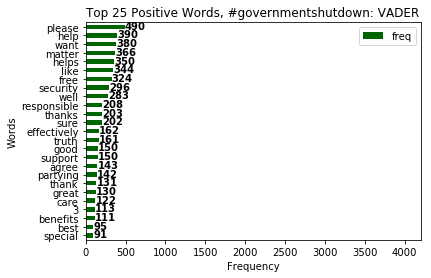

In [15]:
import nltk
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posit = Counter(posDist)
positdf = pd.DataFrame.from_dict(posit, orient='index').reset_index()
positdf = positdf.rename(columns={'index':'word', 0:'freq'})
positdf = positdf.sort_values('freq', ascending = False)
posdf = positdf[:25]
print(posdf)

fig = posdf.plot(x= 'word',kind='barh', align='center', color =['darkgreen'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Positive Words, #governmentshutdown: VADER')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,4200)

for i, v in enumerate(posdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig(os.path.join(dataResults, 'gvshutdownPosWordsVader.png'), format='png', dpi=300, bbox_inches='tight',)
plt.show()


###### Negative words

Here we plot the top negative words found in our dataset. The places where changes might need to be made are where it says color =['darkred'] where it says fig.set_title, and where it says plt.savefig. The color you can change to a different color of your choosing, so if you do not like dark red, pick something else. The title you will want to change what is in quotes so the title will better fit your own dataset, and finally, plt.savefig you will want to change the filepath part in quotes to point to where you want the .png output file saved as well as what you want the name of the file to be.

       blame           no          pay     affected      painful         stop    suffering      exposes unemployment 

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


        miss 
        4136         1035          566          533          382          308          129          105          103           99 
             word  freq
7           blame  4136
19             no  1035
5             pay   566
99       affected   533
583       painful   382
26           stop   308
249     suffering   129
664       exposes   105
275  unemployment   103
184          miss    99
79            ill    89
286       hurting    89
34          fight    88
23          leave    82
179         drags    78
1           avoid    73
223          poor    73
116          drop    70
126         wrong    70
74         crisis    68
135          hard    67
370          risk    66
107     emergency    66
191        forced    63
120          hell    59


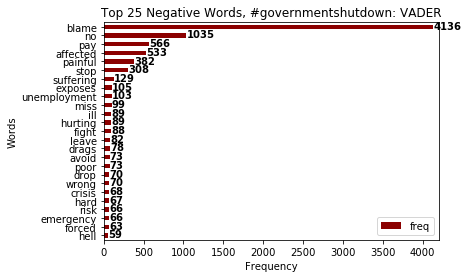

In [16]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
nega = Counter(negDist)
negadf = pd.DataFrame.from_dict(nega, orient='index').reset_index()
negadf = negadf.rename(columns={'index':'word', 0:'freq'})
negadf = negadf.sort_values('freq', ascending = False)
negdf = negadf[:25]
print(negdf)

fig = negdf.plot(x= 'word',kind='barh', align='center', color =['darkred'])
fig.set_ylabel('Words')
fig.set_xlabel('Frequency')
fig.set_title('Top 25 Negative Words, #governmentshutdown: VADER')
fig.set_ylim(fig.get_ylim()[::-1])
fig.set_xlim(0,4200)

for i, v in enumerate(negdf['freq']):
    fig.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams["font.family"] = "sans-serif"
plt.savefig(os.path.join(dataResults, 'gvShutdownNegWordsVader.png'), format='png', dpi=300, bbox_inches='tight',)

plt.show()

## VOILA!!

This code was adapted from Stefan Sinclair's GitHub page called Art of Literary Text Analysis and can be found here: https://github.com/sgsinclair/alta/blob/e908bae2c224578485e10482e812924d7c6b7b05/ipynb/utilities/ComplexSentimentAnalysis.ipynb . Accessed 01/25/2019